In [1]:
# This cell allows the jupyter notebook to take up the space of your full web browser.

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import treecorr as tr
import scipy
import numpy as np
import fitsio
from astropy.io import fits
import fileinput
import copy
import piff
np.random.seed(12345)

In [4]:
stars = np.load("/nfs/slac/kipac/fs1/g/des/aresh/y1_500_exposure_fit_check_band_i_shape_mode_round2/00228724/stars_test_psf_optatmo_const_gpvonkarman_meanified.npy", allow_pickle=True)

In [31]:
print(stars[0].x)
print(stars[0].y)
print(stars[0].u)
print(stars[0].v)
print(stars[0].data.__dict__.keys())
print(stars[0].image.array)

782.8690366437461
770.9272077266166
1445.6309823427816
3323.361436819138
dict_keys(['image', 'image_pos', 'local_wcs', 'weight', 'orig_weight', 'properties', 'pointing', 'field_pos', 'pixel_area'])


In [32]:
print(stars[0].image.wcs)

galsim.GSFitsWCS(_data = ['TPV', array([13423.2, 6307.333]), array([[-2.113948278208e-07, 7.285860725385e-05], [-7.285589384706e-05, -2.104247794635e-07]]), coord.CelestialCoord(coord.Angle(5.767363823646897, coord.radians), coord.Angle(-0.949524493185192, coord.radians)), array([[[0.002108758567445, -0.004088460472031, 0.003932600506368, -0.001252913416519], [1.013793551259, -0.01807717645784, 0.007117865431169, 0.0], [0.006929524503635, -0.006130507938243, 0.0, 0.0], [9.684230777771e-05, 0.0, 0.0, 0.0]], [[-0.0008109020362408, 1.007009608814, -0.008988581717303, 0.003683177040385], [-0.006974260639866, 0.0139137067417, -0.007237035926193, 0.0], [-0.009038260938334, 0.006468132179531, 0.0, 0.0], [-0.002540663630798, 0.0, 0.0, 0.0]]]), None, None])


In [13]:
print(stars[0].data.local_wcs)

galsim.JacobianWCS(0.0035256795967434896, -0.2628037783953464, -0.2623534712934366, -0.0029948850847575387)


In [6]:
x = 1000.0
y = 100.0

u_over_y_abs_values = []
v_over_x_abs_values = []
us = []
vs = []
for star in stars:
    dummy_u = star.data.local_wcs._u(x,y)
    dummy_v = star.data.local_wcs._v(x,y)
    u_over_y_abs_value = np.abs(dummy_u/y)
    v_over_x_abs_value = np.abs(dummy_v/x)
    u_over_y_abs_values.append(u_over_y_abs_value)
    v_over_x_abs_values.append(v_over_x_abs_value)
    u = star.u
    v = star.v
    us.append(u)
    vs.append(v)

Text(0.5, 1.0, 'u/y')

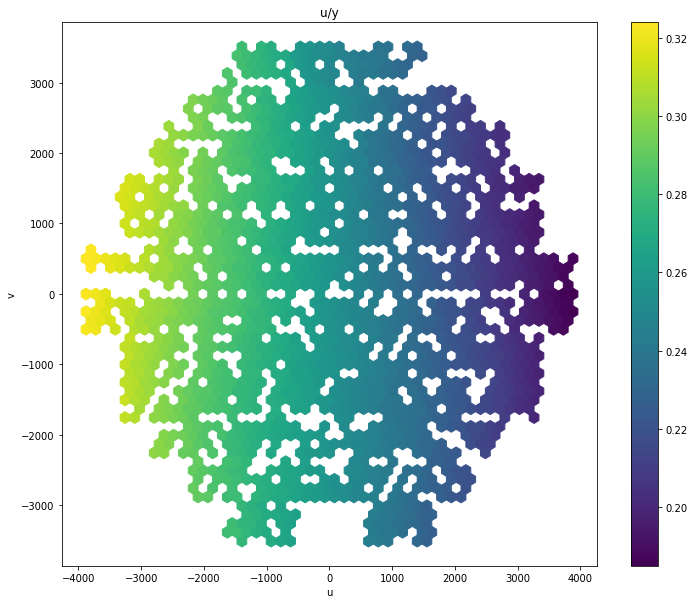

In [7]:
plt.figure(figsize=(12.0,10.0))
plt.hexbin(us, vs, C=u_over_y_abs_values, gridsize=50)
plt.colorbar()
plt.xlabel("u")
plt.ylabel("v")
plt.title("u/y")

Text(0.5, 1.0, 'v/x')

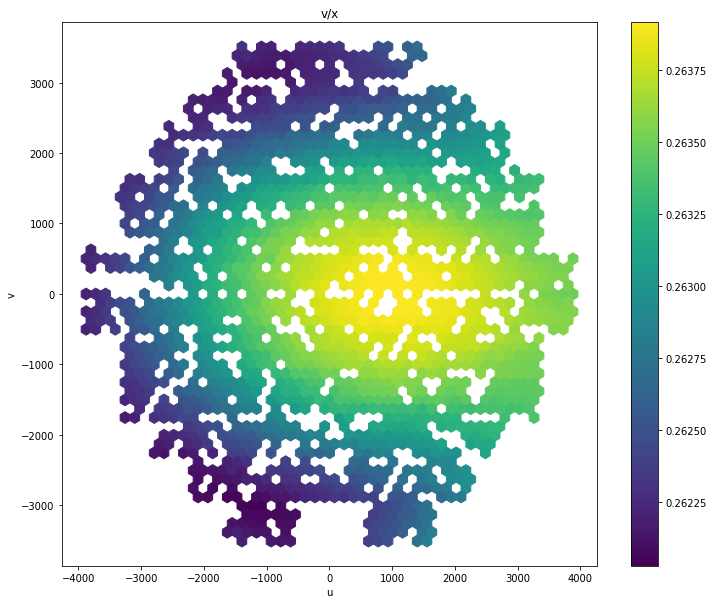

In [8]:
plt.figure(figsize=(12.0,10.0))
plt.hexbin(us, vs, C=v_over_x_abs_values, gridsize=50)
plt.colorbar()
plt.xlabel("u")
plt.ylabel("v")
plt.title("v/x")

In [9]:
x = 1000.0
y = 100.0

u_over_y_abs_values = []
v_over_x_abs_values = []
us = []
vs = []
for star in stars:
    u = star.u
    v = star.v    
    star.data.local_wcs = star.data.image.wcs.local(star.data.image_pos)
    dummy_u = star.data.local_wcs._u(x,y)
    dummy_v = star.data.local_wcs._v(x,y)
    u_over_y_abs_value = np.abs(dummy_u/y)
    v_over_x_abs_value = np.abs(dummy_v/x)
    u_over_y_abs_values.append(u_over_y_abs_value)
    v_over_x_abs_values.append(v_over_x_abs_value)
    us.append(u)
    vs.append(v)

Text(0.5, 1.0, 'u/y')

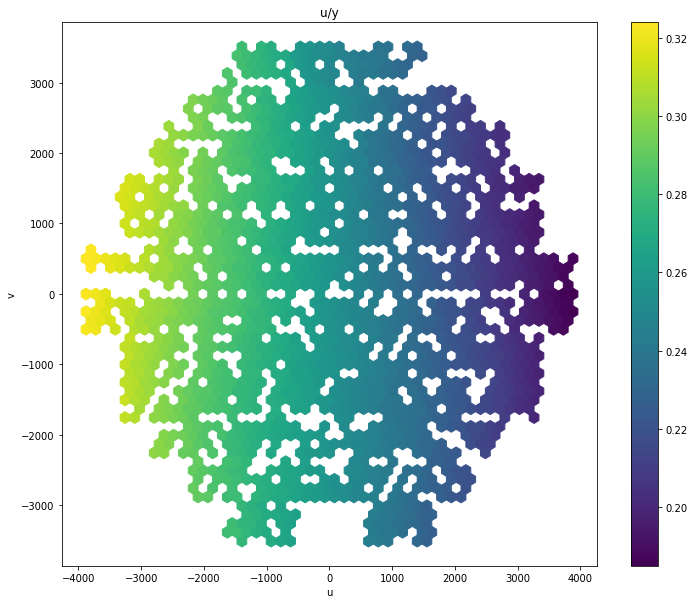

In [10]:
plt.figure(figsize=(12.0,10.0))
plt.hexbin(us, vs, C=u_over_y_abs_values, gridsize=50)
plt.colorbar()
plt.xlabel("u")
plt.ylabel("v")
plt.title("u/y")

Text(0.5, 1.0, 'v/x')

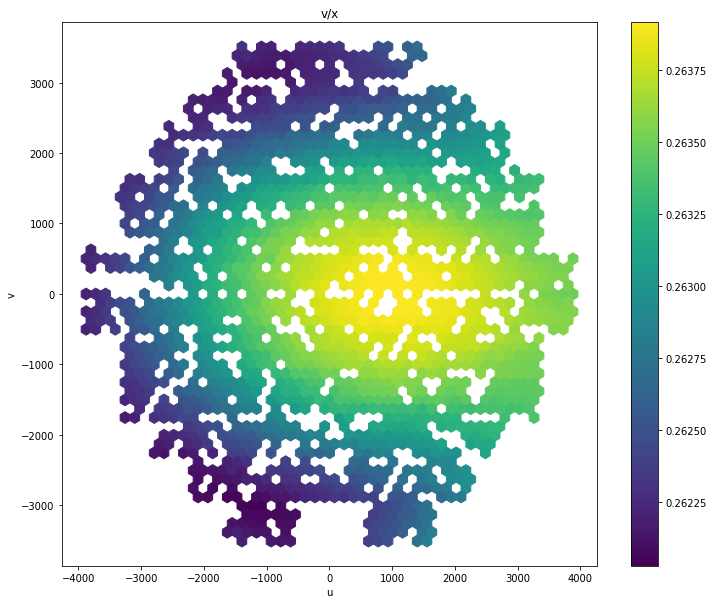

In [11]:
plt.figure(figsize=(12.0,10.0))
plt.hexbin(us, vs, C=v_over_x_abs_values, gridsize=50)
plt.colorbar()
plt.xlabel("u")
plt.ylabel("v")
plt.title("v/x")